# Iris Flower Classification

Steps to build a ML model:

1)Import dataset.

2)Visualizing the dataset.

3)Data preparation.

4)Training the algorithm.

5)Making Perdiction.

6)Model Evolution

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

1. Importing Dataset

In [6]:
iris = pd.read_csv(R"C:\Users\91779\Downloads\archive\Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris.shape

(150, 6)

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


summary of all numeric columns

In [16]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
iris.Species.value_counts(normalize=True)*100

Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: Species, dtype: float64

In [21]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
iris.isnull().sum().sort_values(ascending=False)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
iris[iris.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [24]:
iris.duplicated().sum()

0

2)Visualizing the dataset.

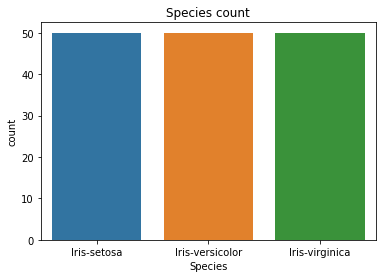

In [26]:
sns.countplot(iris.Species)
plt.title("Species count")
plt.show()

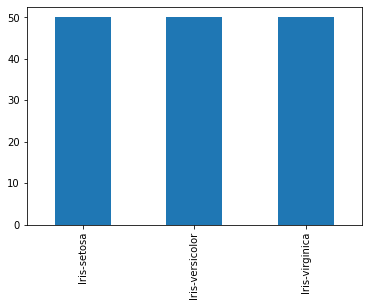

In [27]:
iris.Species.value_counts().plot(kind="bar")
plt.show()

We can see that the species column is well balanced.

Each species has 50 as its count.

{'whiskers': [<matplotlib.lines.Line2D at 0x1260b4f1970>,
 'caps': [<matplotlib.lines.Line2D at 0x1260b46db80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1260b4f1490>],
 'medians': [<matplotlib.lines.Line2D at 0x1260b46d100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1260b46d1c0>],
 'means': []}

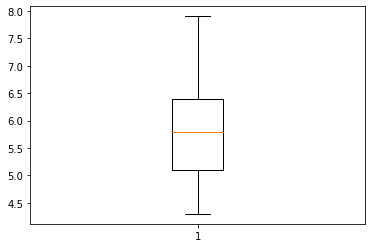

In [37]:
plt.boxplot(iris['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1260b37adf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1260b37a160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1260b37a6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1260b386e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1260b3864c0>],
 'means': []}

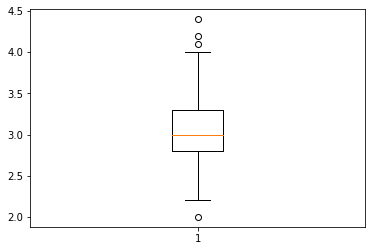

In [38]:
plt.boxplot(iris['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1260adc4ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1260adc4850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1260adee370>],
 'medians': [<matplotlib.lines.Line2D at 0x1260adc4490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1260adc40a0>],
 'means': []}

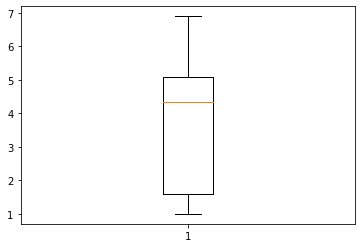

In [39]:
plt.boxplot(iris['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1260a616430>,
 'caps': [<matplotlib.lines.Line2D at 0x1260a616b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1260a61bd60>],
 'medians': [<matplotlib.lines.Line2D at 0x1260a5542e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1260a5544f0>],
 'means': []}

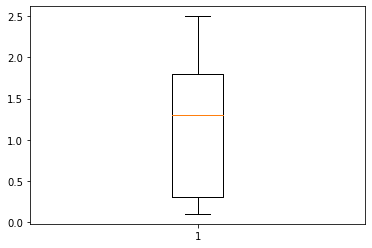

In [40]:
plt.boxplot(df['PetalWidthCm'])

<AxesSubplot:>

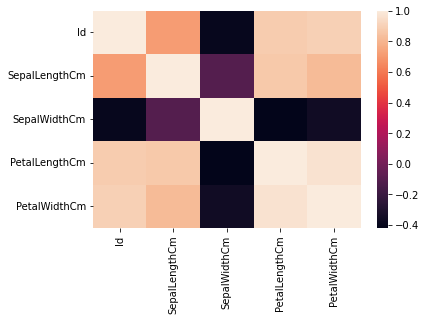

In [41]:
sns.heatmap(iris.corr())

3. Data Preparation

In [42]:
iris.drop('Id',axis=1,inplace=True)

In [43]:
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [44]:
iris.Species=[sp[i] for i in df.Species]
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [45]:
X=iris.iloc[:,0:4]

In [46]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y=iris.iloc[:,4]

In [48]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

Understanding the variable/column distribution

In [68]:
iris.describe().columns



Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

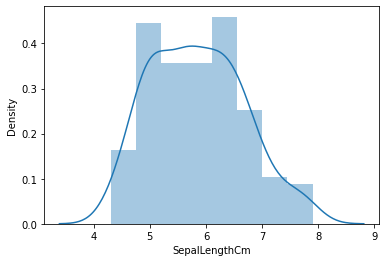

In [69]:
sns.distplot(iris.SepalLengthCm)
plt.show()

Histogram of SepalLengthCm


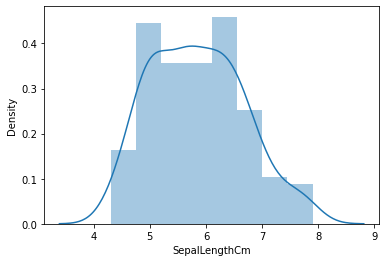

Histogram of SepalWidthCm


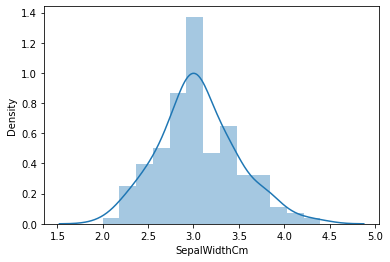

Histogram of PetalLengthCm


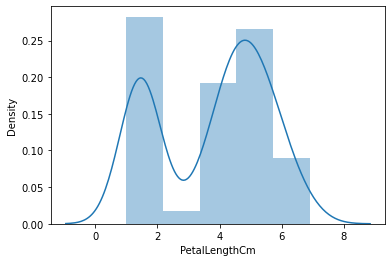

Histogram of PetalWidthCm


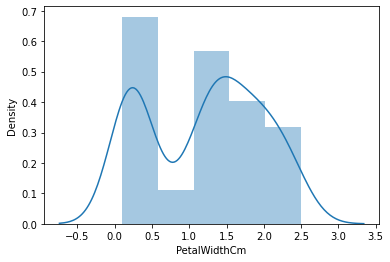

Histogram of Species


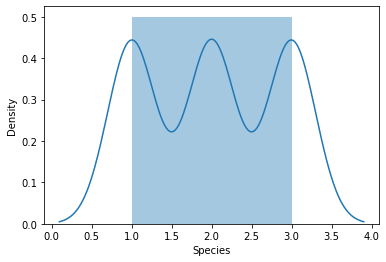

In [70]:
for i in iris.describe().columns:
    sns.distplot(iris[i])
    plt.title(print("Histogram of",i))
    plt.show()
    print("="*70)

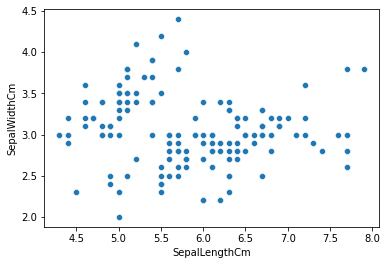

In [71]:
sns.scatterplot(iris.SepalLengthCm, iris.SepalWidthCm)
plt.show()

As sepal length increases, sepal width also increases.

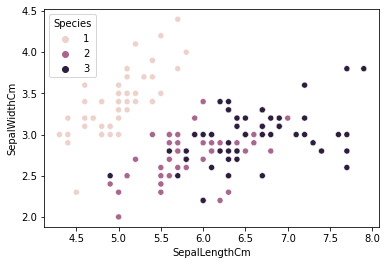

In [74]:
sns.scatterplot(iris.SepalLengthCm, iris.SepalWidthCm, hue=iris.Species)
plt.show()

Species1 has smaller sepal length but higher width.

Species2 lies almost middle for length as well aw width.

Species3 has larger sepal lengths and smaller sepal widths.

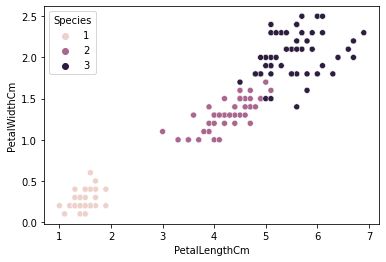

In [75]:
sns.scatterplot(iris.PetalLengthCm, iris.PetalWidthCm, hue=iris.Species)
plt.show()

 species1 have the smallest petal legth and petal width.

species2 have average petal legth and petal width.

species3 have the highest petal legth and petal width.

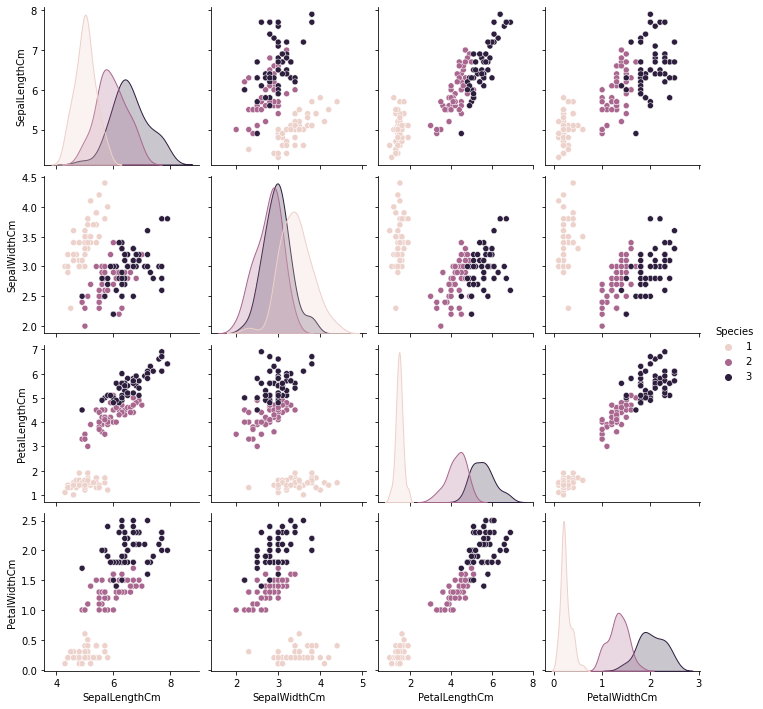

In [77]:
sns.pairplot(iris, hue='Species')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

4.Traning Model

In [80]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [81]:
model.score(X,y)

0.9304223675331595

In [82]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [83]:
model.intercept_

1.192083994828144

5. Making Predictions


In [84]:
y_pred=model.predict(X_test)

6. Model Evolution

In [85]:
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 0.04
